# Multiple Linear Regression USING Greadient Descent Algorithm

In [299]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [300]:
y = np.array([-3.7, 3.5, 2.5, 11.5, 5.7])
x1 = np.array([3, 4, 5, 6, 2])
x2 = np.array([8, 5, 7, 3, 1])

consider m - slope
         c - intercept

In [301]:
m1 = 0
m2 = 0
c = 0
learning_rate = 0.001

In [302]:
# Calculation of Mean Squared Error
def loss(y, yp):
    n = len(y)
    s = 0 #sum of squared residuals
    for i in range(n):
        s += (y[i] - yp[i])**2
    return s/n #Mean value

In [303]:
# Code for m1x1 + m2x2 + c
def predicted_y(m1, m2, x1, x2, c):
    return m1 * x1 + m2 * x2 + c


In [304]:
# Derivative of loss wrt to m1
def dldm1(x1, x2, y, yp):
    n = len(y)
    return (2 / n) * np.sum(-x1 * (y - yp))

# Derivative of loss wrt to m2
def dldm2(x1, x2, y, yp):
    n = len(y)
    return (2 / n) * np.sum(-x2 * (y - yp))

In [305]:
# Derivative of loss wrt to c
def dldb(y, yp):
    n = len(y)
    return (2 / n) * np.sum(-(y - yp))

In [306]:
# m1, m2, and c values updation
epoch = 1000
loss_values = []
ypred = []

for i in range(epoch):
    yp = predicted_y(m1, m2, x1, x2, c)
    m1 = m1 - learning_rate * dldm1(x1, x2, y, yp)
    m2 = m2 - learning_rate * dldm2(x1, x2, y, yp)
    c = c - learning_rate * dldb(y, yp)
    loss_val = loss(y, yp)
    loss_values.append(loss_val)

In [312]:

for i in range(epoch):
    ypred = predicted_y(m1, m2, x1, x2, c)
    ynew = loss(y, yp)
    ypred = np.append(ypred, ynew)

[-3.9186611   3.4059262   2.88962153 11.78238722  4.43853554  0.37603341]


In [308]:
print("slope (m1):", m1)
print("slope (m2):", m2)
print("intercept (c):", c)

slope (m1): 2.620052116887668
slope (m2): -1.5681783944793242
intercept (c): 0.766609701933215


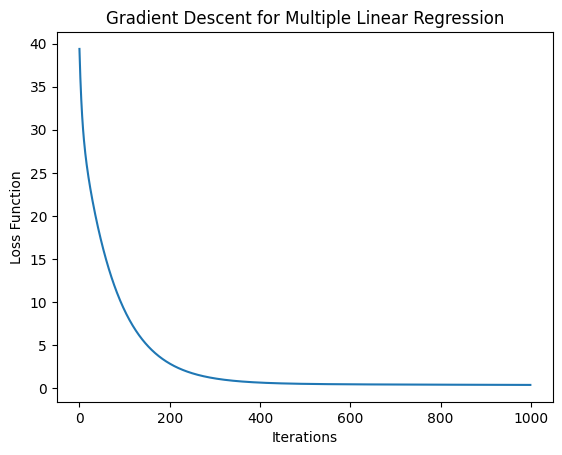

In [309]:
plt.plot(range(epoch), loss_values)
plt.xlabel("Iterations")
plt.ylabel("Loss Function")
plt.title("Gradient Descent for Multiple Linear Regression")
plt.show()

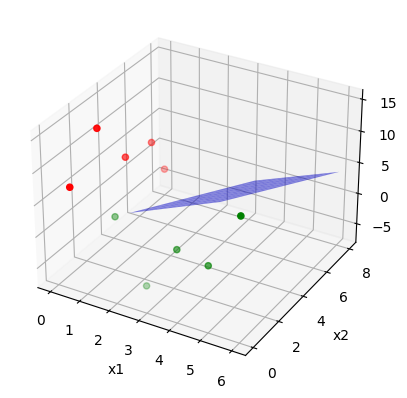

In [313]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, np.zeros_like(x1), y, c='green', marker='o', label='x1 & y')
ax.scatter(np.zeros_like(x2), x2, y, c='red', marker='o', label='x2 & y')



x1_grid, x2_grid = np.meshgrid(np.linspace(min(x1), max(x1), 10), np.linspace(min(x2), max(x2), 10))
yp_grid = predicted_y(m1, m2, x1_grid, x2_grid, c)

ax.plot_surface(x1_grid, x2_grid, yp_grid, alpha=0.5, color='blue')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

plt.show()